# **SESSION 10 PRACTICAL APPLICATION ON TREE-BASED METHODS**
============================================================================================================================================
- Date: 01/03/2023
- Student: Pablo Ostos Bollmann
- Professor: Pablo Gervás
- Master: MCSBT

============================================================================================================================================

Importing necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn import model_selection
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, r2_score, confusion_matrix 
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict 
from sklearn.model_selection import LeaveOneOut, KFold

# models:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier

Function to calculate accuracy and predictions 

In [2]:
# Function to calculate accuracy 
def cal_accuracy(y_test, y_pred): 
      
    print("Confusion Matrix: \n", 
        confusion_matrix(y_test, y_pred)) 
      
    print ("Accuracy : ", 
    accuracy_score(y_test,y_pred)*100) 
      
    print("Report : \n", 
    classification_report(y_test, y_pred))

# Function to make predictions 
def prediction(X_test, clf_object): 
  
    # Predicton on test with giniIndex 
    y_pred = clf_object.predict(X_test) 
    #print("Predicted values:") 
    #print(y_pred) 
    return y_pred  

# **Classifiers**

Before starting with the analysis let's declare all the functions that contain our classifiers and that we will be applying to both datasets. For this assignment we have to take a closer look to three methods/functions for the classifiers: 
- The Train function fits the training data to the classifier.
- The Prediction function inputs the testing data into the previously trained classifier and produces a prediction of the target value.
- The Results function prints the confusion matrix, accuracy results, and classification report.

### **Decision tree**

This code defines a function that trains a decision tree classifier using the Gini impurity criterion and specific parameters such as 'max_depth' and 'min_samples_leaf'. The trained classifier object is then returned from the function, which can be used for making predictions on new data.

In [3]:
# Function to perform training with giniIndex. 
def train_Decision_Tree(X_train, y_train): 

    # Creating the classifier object 
    clf_gini = DecisionTreeClassifier(
            criterion = "gini", 
            random_state = 100,
            max_depth=3, min_samples_leaf=5) 

    # Performing training 
    clf_gini.fit(X_train, y_train) 
    return clf_gini 

### **Adaboost**

This code defines a function that trains an AdaBoost classifier with a specific number of decision trees. The trained classifier object is then returned from the function, which can be used for making predictions on new data. The AdaBoost algorithm works by sequentially adding decision trees to the ensemble, where each new tree is trained on the training data with a higher weight assigned to the misclassified samples from the previous tree. This approach allows the ensemble to focus on the samples that are difficult to classify, improving the overall accuracy of the classifier.

In [4]:
# Function to perform training with adaboost. 
def train_Adaboost(X_train, y_train): 
        seed = 7
        num_trees = 30
        # Creating the classifier object 
        clf_adaboost = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)

        # Performing training 
        clf_adaboost.fit(X_train, y_train) 
        return clf_adaboost 

### **Bagging**

This code defines a function that trains a Bagging classifier with a specific number of decision trees. The Bagging algorithm works by training multiple instances of a base estimator on different subsets of the training data, and then combining the predictions of these estimators by taking a majority vote. This approach helps to reduce overfitting and improve the accuracy of the classifier.

In [5]:
# Function to perform training with bagging. 
def train_Bagging(X_train, y_train): 
        seed = 7
        cart = DecisionTreeClassifier()
        num_trees = 100
        # Creating the classifier object 
        clf_bagging = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)

        # Performing training 
        clf_bagging.fit(X_train, y_train) 
        return clf_bagging 

### **Gradient Boosting**

This code defines a function that trains a Gradient Boosting classifier. The function takes two arguments, 'X_train' and 'y_train'. Inside the function, a new GradientBoostingClassifier object is created using the n_estimators parameter set to 100 and the random_state parameter set to 7. The fit method is called on the classifier object, which trains the classifier on the input training data X_train and y_train. Finally, the trained classifier object clf_gb is returned from the function. Gradient Boosting is an ensemble method that combines weak learners (in this case, decision trees) in a stage-wise manner to build a stronger classifier.

In [6]:
# Function to perform training with Gradient Boosting. 
def train_GradientBoosting(X_train, y_train): 
        seed = 7
        num_trees = 100
        # Creating the classifier object 
        clf_gb = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)

        # Performing training 
        clf_gb.fit(X_train, y_train) 
        return clf_gb 

### **Random Forest**

This code defines a function that trains a Random Forest classifier. The function takes two arguments, X_train and y_train, which represent the feature matrix and target vector of the training data. Inside the function, a new RandomForestClassifier object is created using the n_estimators parameter set to 100 and the max_features parameter set to 3. The fit method is called on the classifier object, which trains the classifier on the input training data X_train and y_train. Finally, the trained classifier object clf_rf is returned from the function. Random Forest is an ensemble method that creates multiple decision trees and combines them to make a more accurate and stable prediction. It does this by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

In [7]:
# Function to perform training with Gradient Boosting. 
def train_RandomForest(X_train, y_train): 
        seed = 7
        num_trees = 100
        max_features = 3
        # Creating the classifier object 
        clf_rf = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)

        # Performing training 
        clf_rf.fit(X_train, y_train) 
        return clf_rf 

# **IRIS**

## **Loads a data set**

In [8]:
# Load the Diabetes dataset
columns = "sepal_length sepal_width petal_length petal_width".split() # Declare the columns names
iris = datasets.load_iris() # Call the diabetes dataset from sklearn
iris_df = pd.DataFrame(iris.data, columns=columns) # load the dataset as a pandas data frame
iris_y = iris.target # define the target variable (dependent variable) as y

In [10]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### **Iris plottings**

Let's proceed and do a scatter plot of the iris dataset. First we will plot the length vs. width of the sepal

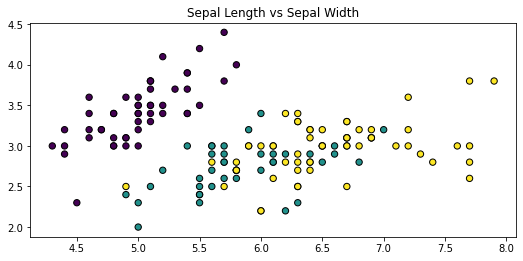

In [13]:
# Plotting the dataset
plt.figure(figsize=(7.50, 3.50))
plt.subplots_adjust(bottom=0.05, top=0.9, left=0.05, right=0.95)
plt.subplot(111)
plt.title("Sepal Length vs Sepal Width", fontsize="12")
plt.scatter(iris_df['sepal_length'], iris_df['sepal_width'], marker="o", c=iris_y, s=40, edgecolor="k")
plt.show()

Now we can also plot the length vs width of the Petal

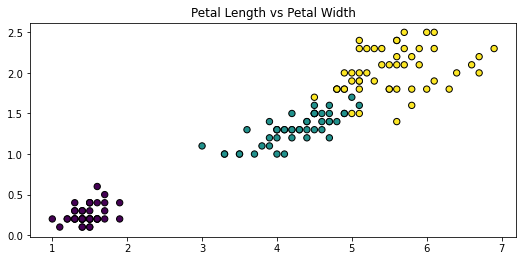

In [15]:
# Plotting the dataset
plt.figure(figsize=(7.50, 3.50))
plt.subplots_adjust(bottom=0.05, top=0.9, left=0.05, right=0.95)
plt.subplot(111)
plt.title("Petal Length vs Petal Width", fontsize="12")
plt.scatter(iris_df['petal_length'], iris_df['petal_width'], marker="o", c=iris_y, s=40, edgecolor="k")
plt.show()

With the two plottings above, we can see that the classes are well distributed according to the different features. This indicates that these features might be significant for the classification

In [1]:
# Plot dendrogram
plt.figure(figsize=(20, 7))  
plt.title("Dendrograms")  

# Create dendrogram
sc.dendrogram(sc.linkage(iris_df, method='ward'))

plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')

NameError: name 'plt' is not defined

## **Iris validations**

Validation is a process of assessing the performance of a trained model on an independent dataset. The purpose of validation is to evaluate the generalization ability of the model. For this purpose, I will be performing different types of validations for each of the classifiers, then I will analyse which combination of classifier/validation method offers the best performance score. 

### **Validation 1 (train-test)**

We first split the dataset into train and test with the train_test_split() function in sklearn library

In [22]:
# Spliting the dataset into train and test 
iris_X_train, iris_X_test, iris_y_train, iris_y_test = train_test_split(iris_df, iris_y, test_size = 0.3, random_state = 100)

#### **Decision Tree**

In [23]:
# Train classifier
dt_clf = train_Decision_Tree(iris_X_train, iris_y_train)
# clf_entropy = train_using_entropy(iris_X_train, iris_y_train)

# Predict in both cases
iris_y_pred = prediction(iris_X_test, dt_clf)
# iris_y_pred_entropy = prediction(iris_X_test, clf_entropy)

# Calculate accuracy in both cases
cal_accuracy(iris_y_test, iris_y_pred)
# cal_accuracy(iris_y_test, iris_y_pred_entropy)

Confusion Matrix: 
 [[16  0  0]
 [ 0 10  1]
 [ 0  1 17]]
Accuracy :  95.55555555555556
Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.91      0.91      0.91        11
           2       0.94      0.94      0.94        18

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



With this validation method we can see how no mistakes are made whenever predicting the class '0', and just one mistake was made when predicting classes 1 and 2

#### **Adaboost**

In [27]:
# Train classifier
ab_clf = train_Adaboost(iris_X_train, iris_y_train)
# clf_entropy = train_using_entropy(iris_X_train, iris_y_train)

# Predict in both cases
iris_y_pred = prediction(iris_X_test, ab_clf)
# iris_y_pred_entropy = prediction(iris_X_test, clf_entropy)

# Calculate accuracy in both cases
cal_accuracy(iris_y_test, iris_y_pred)
# cal_accuracy(iris_y_test, iris_y_pred_entropy)

Confusion Matrix: 
 [[16  0  0]
 [ 0 10  1]
 [ 0  1 17]]
Accuracy :  95.55555555555556
Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.91      0.91      0.91        11
           2       0.94      0.94      0.94        18

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



#### **Bagging**

In [28]:
# Train classifier
bag_clf = train_Bagging(iris_X_train, iris_y_train)
# clf_entropy = train_using_entropy(iris_X_train, iris_y_train)

# Predict in both cases
iris_y_pred = prediction(iris_X_test, bag_clf)
# iris_y_pred_entropy = prediction(iris_X_test, clf_entropy)

# Calculate accuracy in both cases
cal_accuracy(iris_y_test, iris_y_pred)
# cal_accuracy(iris_y_test, iris_y_pred_entropy)

Confusion Matrix: 
 [[16  0  0]
 [ 0 10  1]
 [ 0  1 17]]
Accuracy :  95.55555555555556
Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.91      0.91      0.91        11
           2       0.94      0.94      0.94        18

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



#### **Gradient Boosting**

In [29]:
# Train classifier
gb_clf = train_Bagging(iris_X_train, iris_y_train)
# clf_entropy = train_using_entropy(iris_X_train, iris_y_train)

# Predict in both cases
iris_y_pred = prediction(iris_X_test, gb_clf)


# Calculate accuracy in both cases
cal_accuracy(iris_y_test, iris_y_pred)


Confusion Matrix: 
 [[16  0  0]
 [ 0 10  1]
 [ 0  1 17]]
Accuracy :  95.55555555555556
Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.91      0.91      0.91        11
           2       0.94      0.94      0.94        18

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



#### **Random Forest**

In [30]:
# Train classifier
rf_clf = train_Bagging(iris_X_train, iris_y_train)
# clf_entropy = train_using_entropy(iris_X_train, iris_y_train)

# Predict in both cases
iris_y_pred = prediction(iris_X_test, rf_clf)


# Calculate accuracy in both cases
cal_accuracy(iris_y_test, iris_y_pred)


Confusion Matrix: 
 [[16  0  0]
 [ 0 10  1]
 [ 0  1 17]]
Accuracy :  95.55555555555556
Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.91      0.91      0.91        11
           2       0.94      0.94      0.94        18

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



**As we can see the validation method #1 offers the same result no matter the classifier model we are using 95.5556**

### **Validation 2 (leave one out)**

In [10]:
loo = LeaveOneOut()

#### **Decision Tree**

In [13]:
results = cross_val_score(BaggingClassifier(), iris_df, iris_y, cv=loo)
print("Bagging Accuracy : ",results.mean())

Bagging Accuracy :  0.9533333333333334


#### **Adaboost**

In [15]:
results = cross_val_score(AdaBoostClassifier(), iris_df, iris_y, cv=loo)
print("Adaboost Accuracy : ",results.mean())

Adaboost Accuracy :  0.9533333333333334


#### **Bagging**

In [16]:
results = cross_val_score(BaggingClassifier(), iris_df, iris_y, cv=loo)
print("Bagging Accuracy : ",results.mean())

Bagging Accuracy :  0.9533333333333334


#### **Gradient Boosting**

In [17]:
results = cross_val_score(GradientBoostingClassifier(), iris_df, iris_y, cv=loo)
print("Gradient Boosting Accuracy : ",results.mean())

Gradient Boosting Accuracy :  0.9533333333333334


#### **Random Forest**

In [18]:
results = cross_val_score(RandomForestClassifier(), iris_df, iris_y, cv=loo)
print("Random Forest Accuracy : ",results.mean())

Random Forest Accuracy :  0.96


**As we can see the validation method #2, leave one out gives pretty consistnet results for all classifiers (0.95333) but with the Random FOrest it returns an accuracy of 0.96**

### **Validation 3 (K-fold)**

This line of code creates an object kfold of the KFold class with 10 splits. KFold is a cross-validation technique used to evaluate the performance of a machine learning model. The n_splits parameter specifies the number of folds.  The number of times the data will be split into training and validation sets. In this case, the data will be split into 10 folds, with each fold used as a validation set once, and the remaining nine folds used as the training set. This process will be repeated 10 times, with each fold used as a validation set once. KFold is useful for avoiding overfitting and obtaining a more reliable estimate of the model's performance on unseen data.

In [24]:
kfold = KFold(n_splits=10)

#### **Decision Tree**

In [25]:
results = cross_val_score(DecisionTreeClassifier(), iris_df, iris_y, cv=kfold)
print("Decision Tree Accuracy : ",results.mean())

Decision Tree Accuracy :  0.9466666666666667


#### **Adaboost**

In [31]:
results = cross_val_score(AdaBoostClassifier(), iris_df, iris_y, cv=kfold)
print("Adaboost Accuracy : ",results.mean())

Adaboost Accuracy :  0.9400000000000001


#### **Bagging**

In [32]:
results = cross_val_score(BaggingClassifier(), iris_df, iris_y, cv=kfold)
print("Bagging Accuracy : ",results.mean())

Bagging Accuracy :  0.9333333333333333


#### **Gradient Boosting**

In [34]:
results = cross_val_score(GradientBoostingClassifier(), iris_df, iris_y, cv=kfold)
print("Gradient Boosting Accuracy : ",results.mean())

Gradient Boosting Accuracy :  0.9266666666666667


#### **Random Forest**

In [35]:
results = cross_val_score(RandomForestClassifier(), iris_df, iris_y, cv=kfold)
print("Random Forest Accuracy : ",results.mean())

Random Forest Accuracy :  0.9466666666666667


**For the validation method #3, results between the different classifiers are pretty consistent, however we notice that we obtain the best result with the RandomForest model with an accuracy of 0.94667**

### **Validation 4 (cross validation)**

In cross-validation, the data is partitioned into multiple folds, and the model is trained and evaluated on each fold in turn.

#### **Decision Tree**

Cross-validated scores: [0.96 1.   0.92 0.92 1.   1.  ]
Cross-Predicted Accuracy: 0.9533333333333334


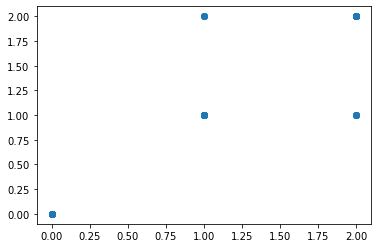

In [54]:
# Perform 6-fold cross validation
scores = cross_val_score(DecisionTreeClassifier(), iris_df, iris_y, cv=6)
print("Cross-validated scores:", scores)

# Make cross validated predictions
predictions = cross_val_predict(DecisionTreeClassifier(), iris_df, iris_y, cv=6)
plt.scatter(iris_y, predictions)

accuracy = accuracy_score(iris_y, predictions)
print("Cross-Predicted Accuracy:", accuracy)

#### **Adaboost**

Cross-validated scores: [0.96 1.   0.92 0.88 0.92 1.  ]
Cross-Predicted Accuracy: 0.9466666666666667


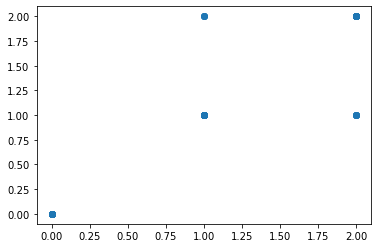

In [55]:
# Perform 6-fold cross validation
scores = cross_val_score(AdaBoostClassifier(), iris_df, iris_y, cv=6)
print("Cross-validated scores:", scores)

# Make cross validated predictions
predictions = cross_val_predict(AdaBoostClassifier(), iris_df, iris_y, cv=6)
plt.scatter(iris_y, predictions)

accuracy = accuracy_score(iris_y, predictions)
print("Cross-Predicted Accuracy:", accuracy)

#### **Bagging**

Cross-validated scores: [0.96 1.   0.92 0.92 0.92 1.  ]
Cross-Predicted Accuracy: 0.9533333333333334


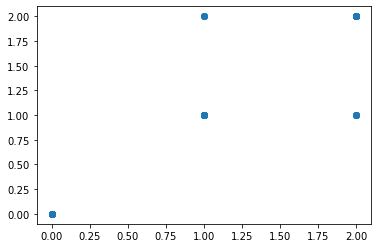

In [56]:
# Perform 6-fold cross validation
scores = cross_val_score(BaggingClassifier(), iris_df, iris_y, cv=6)
print("Cross-validated scores:", scores)

# Make cross validated predictions
predictions = cross_val_predict(BaggingClassifier(), iris_df, iris_y, cv=6)
plt.scatter(iris_y, predictions)

accuracy = accuracy_score(iris_y, predictions)
print("Cross-Predicted Accuracy:", accuracy)

#### **Gradient Boosting**

Cross-validated scores: [0.96 1.   0.92 0.92 0.92 1.  ]
Cross-Predicted Accuracy: 0.96


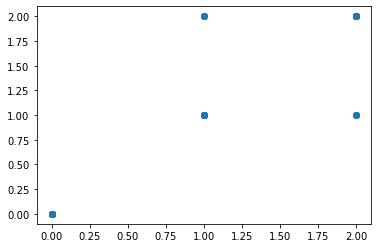

In [57]:
# Perform 6-fold cross validation
scores = cross_val_score(GradientBoostingClassifier(), iris_df, iris_y, cv=6)
print("Cross-validated scores:", scores)

# Make cross validated predictions
predictions = cross_val_predict(GradientBoostingClassifier(), iris_df, iris_y, cv=6)
plt.scatter(iris_y, predictions)

accuracy = accuracy_score(iris_y, predictions)
print("Cross-Predicted Accuracy:", accuracy)

#### **Random Forest**

Cross-validated scores: [0.96 1.   0.92 0.92 0.92 1.  ]
Cross-Predicted Accuracy: 0.9533333333333334


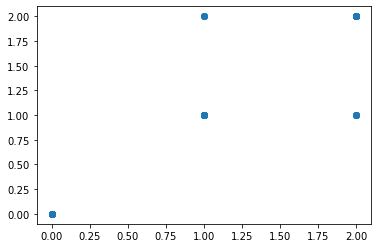

In [58]:
# Perform 6-fold cross validation
scores = cross_val_score(RandomForestClassifier(), iris_df, iris_y, cv=6)
print("Cross-validated scores:", scores)

# Make cross validated predictions
predictions = cross_val_predict(RandomForestClassifier(), iris_df, iris_y, cv=6)
plt.scatter(iris_y, predictions)

accuracy = accuracy_score(iris_y, predictions)
print("Cross-Predicted Accuracy:", accuracy)

**For the validation method #4, we obtain the same result for models Random Forest, Bagging and Decision Tree (0.9533), Adaboost lags a little bit behind (0.94666) and the best performance is offered by GradientBoosting classifier with a 0.96 accuracy score**

============================================

##### *As we can see, with the different validation methods and models, the combination that gives the best performance (accuracy score), is the validation 4, where the Gradient Boosting got an accurachy score of 0.96*

============================================

# **PIMA INDIANS DIABETES**

## **Loads a data set**

In [9]:
# Load the Diabetes dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'] # Declare the columns names
diabetes_df = pd.read_csv(url, names=names)# load the dataset as a pandas data frame
diabetes_y = diabetes_df['class'] # define the target variable (dependent variable) as y
diabetes_X = diabetes_df.drop('class', axis=1)

In [5]:
diabetes_df.head(4)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0


### **Pima diabetes plottings**

plas vs pres plot

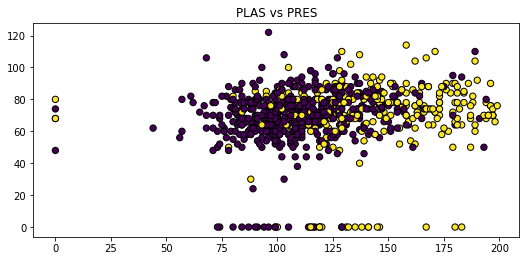

In [40]:
# Plotting the dataset
plt.figure(figsize=(7.50, 3.50))
plt.subplots_adjust(bottom=0.05, top=0.9, left=0.05, right=0.95)
plt.subplot(111)
plt.title("PLAS vs PRES", fontsize="12")
plt.scatter(diabetes_X['plas'], diabetes_X['pres'], marker="o", c=diabetes_y, s=40, edgecolor="k")
plt.show()

mass vs pedi plot

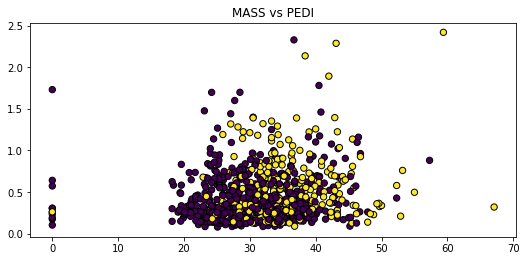

In [41]:
# Plotting the dataset
plt.figure(figsize=(7.50, 3.50))
plt.subplots_adjust(bottom=0.05, top=0.9, left=0.05, right=0.95)
plt.subplot(111)
plt.title("MASS vs PEDI", fontsize="12")
plt.scatter(diabetes_X['mass'], diabetes_X['pedi'], marker="o", c=diabetes_y, s=40, edgecolor="k")
plt.show()

pres vs. age plot

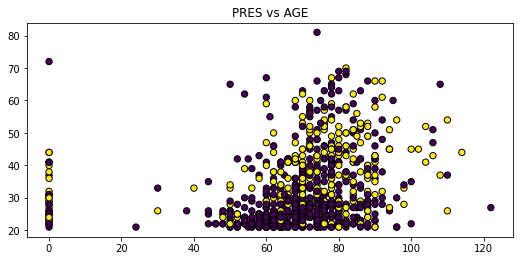

In [42]:
# Plotting the dataset
plt.figure(figsize=(7.50, 3.50))
plt.subplots_adjust(bottom=0.05, top=0.9, left=0.05, right=0.95)
plt.subplot(111)
plt.title("PRES vs AGE", fontsize="12")
plt.scatter(diabetes_X['pres'], diabetes_X['age'], marker="o", c=diabetes_y, s=40, edgecolor="k")
plt.show()

As we can see in the plottings above, we can notice a difference between the two groups 

## **Pima Diabetes Validations**

### **Validation 1 (train-test)**

We start this validation method with the train-test split 

In [43]:
# Spliting the dataset into train and test 
diabetes_X_train, diabetes_X_test, diabetes_y_train, diabetes_y_test = train_test_split(diabetes_X, diabetes_y, test_size = 0.3, random_state = 100)

#### **Decision Tree**

In [44]:
# Train classifier
dt_clf = train_Decision_Tree(diabetes_X_train, diabetes_y_train)
# clf_entropy = train_using_entropy(diabetes_X_train, iris_y_train)

# Predict in both cases
diabetes_y_pred = prediction(diabetes_X_test, dt_clf)
# iris_y_pred_entropy = prediction(iris_X_test, clf_entropy)

# Calculate accuracy in both cases
cal_accuracy(diabetes_y_test, diabetes_y_pred)


Confusion Matrix: 
 [[140  10]
 [ 54  27]]
Accuracy :  72.2943722943723
Report : 
               precision    recall  f1-score   support

           0       0.72      0.93      0.81       150
           1       0.73      0.33      0.46        81

    accuracy                           0.72       231
   macro avg       0.73      0.63      0.64       231
weighted avg       0.72      0.72      0.69       231



#### **Adaboost**

In [45]:
# Train classifier
ab_clf = train_Adaboost(diabetes_X_train, diabetes_y_train)
# clf_entropy = train_using_entropy(iris_X_train, iris_y_train)

# Predict in both cases
diabetes_y_pred = prediction(diabetes_X_test, ab_clf)
# iris_y_pred_entropy = prediction(iris_X_test, clf_entropy)

# Calculate accuracy in both cases
cal_accuracy(diabetes_y_test, diabetes_y_pred)


Confusion Matrix: 
 [[120  30]
 [ 37  44]]
Accuracy :  70.995670995671
Report : 
               precision    recall  f1-score   support

           0       0.76      0.80      0.78       150
           1       0.59      0.54      0.57        81

    accuracy                           0.71       231
   macro avg       0.68      0.67      0.67       231
weighted avg       0.70      0.71      0.71       231



#### **Bagging**

In [46]:
# Train classifier
bag_clf = train_Bagging(diabetes_X_train, diabetes_y_train)
# clf_entropy = train_using_entropy(diabetes_X_train, diabetes_y_train)

# Predict in both cases
diabetes_y_pred = prediction(diabetes_X_test, bag_clf)
# diabetes_y_pred_entropy = prediction(diabetes_X_test, clf_entropy)

# Calculate accuracy in both cases
cal_accuracy(diabetes_y_test, diabetes_y_pred)

Confusion Matrix: 
 [[123  27]
 [ 35  46]]
Accuracy :  73.16017316017316
Report : 
               precision    recall  f1-score   support

           0       0.78      0.82      0.80       150
           1       0.63      0.57      0.60        81

    accuracy                           0.73       231
   macro avg       0.70      0.69      0.70       231
weighted avg       0.73      0.73      0.73       231



#### **Gradient Boosting**

In [47]:
# Train classifier
gb_clf = train_Bagging(diabetes_X_train, diabetes_y_train)
# clf_entropy = train_using_entropy(diabetes_X_train, diabetes_y_train)

# Predict in both cases
diabetes_y_pred = prediction(diabetes_X_test, gb_clf)
# diabetes_y_pred_entropy = prediction(diabetes_X_test, clf_entropy)

# Calculate accuracy in both cases
cal_accuracy(diabetes_y_test, diabetes_y_pred)

Confusion Matrix: 
 [[123  27]
 [ 35  46]]
Accuracy :  73.16017316017316
Report : 
               precision    recall  f1-score   support

           0       0.78      0.82      0.80       150
           1       0.63      0.57      0.60        81

    accuracy                           0.73       231
   macro avg       0.70      0.69      0.70       231
weighted avg       0.73      0.73      0.73       231



#### **Random Forest**

In [48]:
# Train classifier
rf_clf = train_Bagging(diabetes_X_train, diabetes_y_train)
# clf_entropy = train_using_entropy(diabetes_X_train, diabetes_y_train)

# Predict in both cases
diabetes_y_pred = prediction(diabetes_X_test, rf_clf)
# diabetes_y_pred_entropy = prediction(diabetes_X_test, clf_entropy)

# Calculate accuracy in both cases
cal_accuracy(diabetes_y_test, diabetes_y_pred)

Confusion Matrix: 
 [[123  27]
 [ 35  46]]
Accuracy :  73.16017316017316
Report : 
               precision    recall  f1-score   support

           0       0.78      0.82      0.80       150
           1       0.63      0.57      0.60        81

    accuracy                           0.73       231
   macro avg       0.70      0.69      0.70       231
weighted avg       0.73      0.73      0.73       231



**For the validation method #1 we notice accuracy scores are very similar between all the models, however Random Forest, Gradient Boosting and Bagging have better results (73.160) than Decision Trees (72.294) and Adaboost (70.995)**

### **Validation 2 (leave one out)**

In [19]:
loo = LeaveOneOut()

#### **Decision Tree**

In [20]:
results = cross_val_score(DecisionTreeClassifier(), diabetes_X, diabetes_y, cv=loo)
print("Decision Tree Accuracy : ",results.mean())

Decision Tree Accuracy :  0.7057291666666666


#### **Adaboost**

In [21]:
results = cross_val_score(AdaBoostClassifier(), diabetes_X, diabetes_y, cv=loo)
print("Adaboost Accuracy : ",results.mean())

Adaboost Accuracy :  0.76953125


#### **Bagging**

In [22]:
results = cross_val_score(BaggingClassifier(), diabetes_X, diabetes_y, cv=loo)
print("Bagging Accuracy : ",results.mean())

Bagging Accuracy :  0.7643229166666666


#### **Gradient Boosting**

In [23]:
results = cross_val_score(GradientBoostingClassifier(), diabetes_X, diabetes_y, cv=loo)
print("Gradient Boosting Accuracy : ",results.mean())

Gradient Boosting Accuracy :  0.7682291666666666


#### **Random Forest**

In [24]:
results = cross_val_score(RandomForestClassifier(), diabetes_X, diabetes_y, cv=loo)
print("Random Forest Accuracy : ",results.mean())

Random Forest Accuracy :  0.7643229166666666


### **Validation 3 (K-fold)**

#### **Decision Tree**

In [49]:
results = cross_val_score(DecisionTreeClassifier(), diabetes_X, diabetes_y, cv=kfold)
print("Decision Tree Accuracy : ",results.mean())

Decision Tree Accuracy :  0.6912850307587151


#### **Adaboost**

In [50]:
results = cross_val_score(AdaBoostClassifier(), diabetes_X, diabetes_y, cv=kfold)
print("Adaboost Accuracy : ",results.mean())

Adaboost Accuracy :  0.7539473684210527


#### **Bagging**

In [51]:
results = cross_val_score(BaggingClassifier(), diabetes_X, diabetes_y, cv=kfold)
print("Bagging Accuracy : ",results.mean())

Bagging Accuracy :  0.7460355434039645


#### **Gradient Boosting**

In [52]:
results = cross_val_score(GradientBoostingClassifier(), diabetes_X, diabetes_y, cv=kfold)
print("Gradient Boosting Accuracy : ",results.mean())

Gradient Boosting Accuracy :  0.7656015037593986


#### **Random Forest**

In [53]:
results = cross_val_score(RandomForestClassifier(), diabetes_X, diabetes_y, cv=kfold)
print("Random Forest Accuracy : ",results.mean())

Random Forest Accuracy :  0.7603725222146276


**With the validation method #3, K-fold, we notice a significant increase in the accuracy scores when comparing with the train test split validation. With this validation method Gradient boosting stand on top with an accuracy of 0.7656 and Decision Trees experience a drop in performance with an accuracy of 0.69128**

### **Validation 4 (cross validation)**

#### **Decision Tree**

Cross-validated scores: [0.75      0.6796875 0.65625   0.71875   0.7890625 0.7265625]
Cross-Predicted Accuracy: 0.7109375


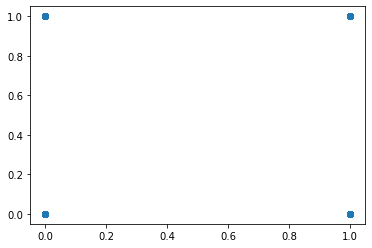

In [59]:
# Perform 6-fold cross validation
scores = cross_val_score(DecisionTreeClassifier(), diabetes_X, diabetes_y, cv=6)
print("Cross-validated scores:", scores)

# Make cross validated predictions
predictions = cross_val_predict(DecisionTreeClassifier(), diabetes_X, diabetes_y, cv=6)
plt.scatter(diabetes_y, predictions)

accuracy = accuracy_score(diabetes_y, predictions)
print("Cross-Predicted Accuracy:", accuracy)

#### **Adaboost**

Cross-validated scores: [0.7421875 0.6953125 0.7265625 0.796875  0.8125    0.78125  ]
Cross-Predicted Accuracy: 0.7591145833333334


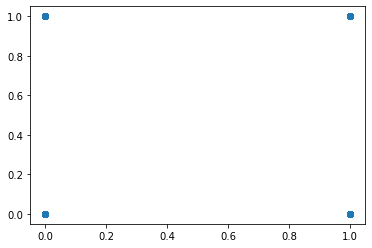

In [60]:
# Perform 6-fold cross validation
scores = cross_val_score(AdaBoostClassifier(), diabetes_X, diabetes_y, cv=6)
print("Cross-validated scores:", scores)

# Make cross validated predictions
predictions = cross_val_predict(AdaBoostClassifier(), diabetes_X, diabetes_y, cv=6)
plt.scatter(diabetes_y, predictions)

accuracy = accuracy_score(diabetes_y, predictions)
print("Cross-Predicted Accuracy:", accuracy)

#### **Bagging**

Cross-validated scores: [0.75      0.65625   0.7265625 0.7734375 0.8046875 0.765625 ]
Cross-Predicted Accuracy: 0.75390625


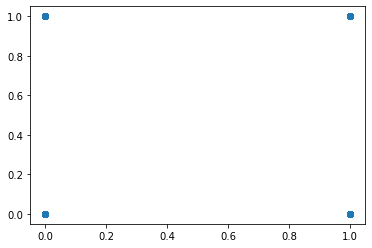

In [61]:
# Perform 6-fold cross validation
scores = cross_val_score(BaggingClassifier(), diabetes_X, diabetes_y, cv=6)
print("Cross-validated scores:", scores)

# Make cross validated predictions
predictions = cross_val_predict(BaggingClassifier(), diabetes_X, diabetes_y, cv=6)
plt.scatter(diabetes_y, predictions)

accuracy = accuracy_score(diabetes_y, predictions)
print("Cross-Predicted Accuracy:", accuracy)

#### **Gradient Boosting**

Cross-validated scores: [0.8046875 0.7421875 0.703125  0.7734375 0.8125    0.78125  ]
Cross-Predicted Accuracy: 0.7643229166666666


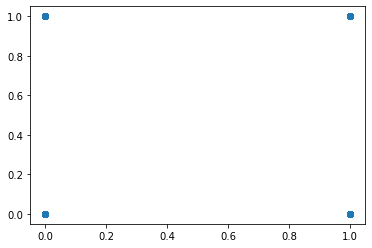

In [62]:
# Perform 6-fold cross validation
scores = cross_val_score(GradientBoostingClassifier(), diabetes_X, diabetes_y, cv=6)
print("Cross-validated scores:", scores)

# Make cross validated predictions
predictions = cross_val_predict(GradientBoostingClassifier(), diabetes_X, diabetes_y, cv=6)
plt.scatter(diabetes_y, predictions)

accuracy = accuracy_score(diabetes_y, predictions)
print("Cross-Predicted Accuracy:", accuracy)

#### **Random Forest**

Cross-validated scores: [0.78125   0.7421875 0.7265625 0.78125   0.8359375 0.7734375]
Cross-Predicted Accuracy: 0.7747395833333334


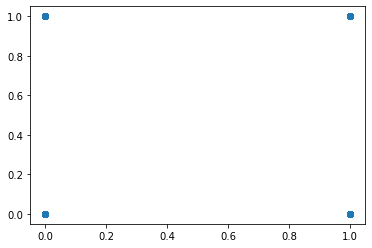

In [63]:
# Perform 6-fold cross validation
scores = cross_val_score(RandomForestClassifier(), diabetes_X, diabetes_y, cv=6)
print("Cross-validated scores:", scores)

# Make cross validated predictions
predictions = cross_val_predict(RandomForestClassifier(), diabetes_X, diabetes_y, cv=6)
plt.scatter(diabetes_y, predictions)

accuracy = accuracy_score(diabetes_y, predictions)
print("Cross-Predicted Accuracy:", accuracy)

**And lastly, for the validation method 4, cross validation, Random forest stand on top with an accuracy score of 0.7747 and Decision tree lags behind with 0.7109**

## **Task 3: Reflect on the applicability of the methods studied**

**In the practical application of tree-based models, the datasets employed have been specifically designed with a target variable intended for classification purposes. As a result, it has become evident that the machine learning models that have been covered in previous classes are not suitable for the analysis of such datasets. It is essential to note that the conventional machine learning models, such as linear regression, logistic regression, and support vector machines, are primarily designed for predicting continuous or numeric target variables. These models rely on statistical assumptions, such as linearity and normality, that are often violated in datasets with categorical target variables.**

**Tree-based models, on the other hand, are well-suited for handling classification problems, such as the ones encountered in the datasets under consideration. They can efficiently handle both binary and multi-class classification problems, making them an excellent choice for solving problems that involve predicting the class of an observation based on a set of features. Tree-based models use a decision tree to split the data into smaller subsets based on the values of the features. This process is repeated recursively until the subsets are small enough to be modeled with a simple function. The resulting model can easily handle complex, non-linear relationships between the features and the target variable, making it an ideal choice for classification tasks.**

**In summary, the datasets used in this practical application of tree-based models have a categorical target variable, rendering the conventional machine learning models unsuitable. However, tree-based models are well-suited for handling such datasets and can effectively model complex, non-linear relationships between the features and the target variable, making them a preferred choice for classification tasks.**